Scratch notebook to figure out what to do with all this new data.

In [2]:
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter labextension install jupyter-leaflet

In [ ]:
#!pip install alphashape
#!pip install ipyleaflet
#!pip install --upgrade ipyleaflet
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
#!pip install libpysal

In [2]:
import geopandas as gpd
#import alphashape
#import ipyleaflet
#from ipyleaflet import *

In [3]:
gdf = gpd.read_file('data/fullwbmodel_invyld/bc_fma_clean/bc1_inv90m.shp')

In [4]:
gdf

,pointid,fma,dist,cc,aw,area_ha,bcov,ygrp,dc,stAge,stHt,geometry
0,464699,1,200.0,12.000000,0.0,0.09,C-Sw,C-Sw_0_A_18,A,18,0,POINT (-1938120.714 2573763.164)
1,483391,1,200.0,16.000000,0.0,0.09,C-Sw,C-Sw_1_A_18,A,18,1,POINT (-1943250.714 2572773.164)
2,483392,1,200.0,12.666667,0.0,0.27,C-Sw,C-Sw_0_A_12,A,12,0,POINT (-1943160.714 2572773.164)
3,485119,1,200.0,16.000000,0.0,0.09,C-Sw,C-Sw_1_A_21,A,21,1,POINT (-1943250.714 2572683.164)
4,485120,1,200.0,12.000000,0.0,0.09,C-Sw,C-Sw_0_A_12,A,12,0,POINT (-1943160.714 2572683.164)
...,...,...,...,...,...,...,...,...,...,...,...,...
1759279,9070355,1,200.0,42.000000,0.0,0.09,C-Pj,C-Pj_30_B_32,B,32,30,POINT (-1868730.714 2346243.164)
1759280,9070356,1,200.0,68.000000,0.0,0.09,C-Sw,C-Sw_44_C_159,C,159,44,POINT (-1868640.714 2346243.164)
1759281,9070357,1,200.0,52.000000,0.0,0.18,C-Pj,C-Pj_42_C_98,C,98,42,POINT (-1868370.714 2346243.164)
1759282,9073992,1,200.0,31.000000,0.0,0.18,C-Pj,C-Pj_23_B_87,B,87,23,POINT (-1868460.714 2346153.164)


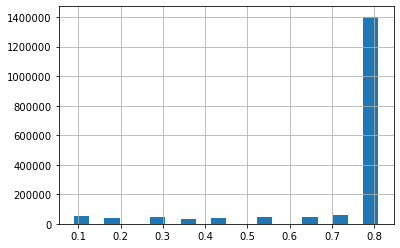

In [262]:
gdf.area_ha.hist(bins=20)

In [254]:
gdf_geometry_points = gdf.geometry

In [255]:
gdf_geometry_squares = gdf_geometry_points.buffer(45, cap_style=3)

In [256]:
gdf.geometry = gdf_geometry_squares

In [258]:
gdf['area_ha_squares'] = gdf.geometry.area * 0.0001

In [6]:
#gdf.bounds

In [276]:
gdf = gdf.sort_values('area_ha', ascending=False)

In [281]:
gdf.head()

,pointid,fma,dist,cc,aw,area_ha,bcov,ygrp,dc,stAge,stHt,geometry,area_ha_squares,area_ha_cs
1663050,7669204,1,200.0,36.111111,0.000000,0.81,C-Sw,C-Sw_16_B_95,B,95,16,"POLYGON ((-1749075.714 2383548.164, -1749075.7...",0.81,0.81
143745,1205709,1,200.0,50.222221,0.000000,0.81,C-Sw,C-Sw_20_C_126,C,126,20,"POLYGON ((-1924575.714 2543928.164, -1924575.7...",0.81,1.62
512000,2152028,1,200.0,26.333334,0.222222,0.81,C-Sw,C-Sw_7_A_55,A,55,7,"POLYGON ((-1883535.714 2517288.164, -1883535.7...",0.81,2.43
512001,2152029,1,200.0,26.000000,0.000000,0.81,C-Sw,C-Sw_5_A_41,A,41,5,"POLYGON ((-1883445.714 2517288.164, -1883445.7...",0.81,3.24
512002,2152030,1,200.0,19.222221,3.333333,0.81,C-Pj,C-Pj_2_A_29,A,29,2,"POLYGON ((-1883355.714 2517288.164, -1883355.7...",0.81,4.05


In [282]:
gdf['area_ha_cs'] = gdf.area_ha_squares.cumsum()

In [286]:
gdf_ = gdf.query('area_ha_cs < %i' % int(gdf.area_ha.sum()))

In [287]:
gdf.shape, gdf_.shape

((1759284, 14), (1588243, 14))

In [288]:
gdf_.area_ha_squares.sum()

1286476.8300000026

In [289]:
gdf.area_ha.sum()

1286477.2800000026

In [290]:
gdf_.to_file('data/foo2.shp')

/opt/jupyterhub/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/tmp/ipykernel_372245/804359541.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_.to_file('data/foo2.shp')


In [ ]:
from libpysal.cg.voronoi import voronoi, voronoi_frames
from libpysal.cg import alpha_shape_auto

In [218]:
gdf_ = gdf.sample(1000)

In [219]:
coords = np.column_stack((gdf.geometry.x, gdf.geometry.y))
coords_ = np.column_stack((gdf_.geometry.x, gdf_.geometry.y))

In [220]:
clip = alpha_shape_auto(coords_).buffer(45)

/home/gparadis/.local/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [221]:
region_df, points_df = voronoi_frames(coords, clip=clip)

In [230]:
center = (clip.representative_point().y, 
          clip.representative_point().x)

In [232]:
m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=6)

In [ ]:
gd_regions = GeoData(geo_dataframe=region_df, 
                     name='regions')
m.add_layer(gd_regions)

In [154]:
#gd_points = GeoData(geo_dataframe=gdf, 
#                    name='points',
#                    point_style={'radius': 2, 'color': 'blue', 'fillOpacity': 0.2, 'fillColor': 'blue', 'weight': 1})

In [236]:
#m.add_layer(gd)
wktlayer = WKTLayer(wkt_string=clip.wkt)
m.add_layer(wktlayer)
m.add_control(LayersControl())

In [237]:
m

Map(center=[2463973.674919598, -1883903.107596678], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [207]:
from libpysal.cg.voronoi import voronoi, voronoi_frames
from libpysal.cg import alpha_shape_auto
points = coord_list = [(x,y) for x,y in zip(gdf_['geometry'].x , gdf_['geometry'].y)]
clip = alpha_shape_auto(np.array(points)).buffer(0.1)
region_df, points_df = voronoi_frames(points, clip=clip)

/home/gparadis/.local/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [208]:
gd_regions = GeoData(geo_dataframe=region_df, 
                     name='regions')
m.add_layer(gd_regions)

In [209]:
m

Map(center=[57.95209316343358, -129.60110258172412], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [7]:
ap = alphashape.alphashape(gdf.sample(100).geometry)

/opt/jupyterhub/lib/python3.8/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/home/gparadis/.local/lib/python3.8/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [41]:
m = Map(basemap=basemaps.CartoDB.Positron, center=)
#m.add_layer(ap)
m

Map(center=[array('d', [-1900682.6532133245]), array('d', [2467027.6865087515])], controls=(ZoomControl(option…

In [10]:
wktlayer = WKTLayer(wkt_string=ap.wkt)

In [11]:
type(wktlayer)

ipyleaflet.leaflet.WKTLayer

In [12]:
wktlayer

WKTLayer(data={'geometry': {'type': 'Polygon', 'coordinates': (((-1869450.7135999985, 2348313.163911717), (-18…

In [20]:
m = Map(basemap=basemaps.CartoDB.Positron, crs=gdf.crs)
#m = Map(basemap=basemaps.CartoDB.Positron, center=ap.centroid.xy)
wktlayer = WKTLayer(wkt_string=ap.wkt)
m.add_layer(wktlayer)

TraitError: The 'crs' trait of a Map instance expected a dict, not the CRS <Derived Projected CRS: ESRI:102001>
Name: Canada_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
.

In [15]:
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [39]:
Map(basemap=basemaps.CartoDB.Positron)


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [46]:
wktlayer

WKTLayer(data={'geometry': {'type': 'Polygon', 'coordinates': (((-1799700.7136000004, 2405643.1639117207), (-1…

In [6]:
m = Map(
    layers=(basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-04-08"), ),
    center=(52.204793, 360.121558),
    zoom=4
)

m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [7]:
type(m)

ipyleaflet.leaflet.Map

In [49]:
from ipyleaflet import Map, Marker
start_location = (53.551086, 9.993682)
m = Map(center=start_location, zoom=16, scroll_wheel_zoom=True)
display(m)

Map(center=[53.551086, 9.993682], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [72]:
from shapely.ops import transform
import pyproj

In [137]:
gdf_ = gdf.sample(100)

In [138]:
gdf_ = gdf_.to_crs('EPSG:4326')
c = gdf_.dissolve().centroid.loc[0]
center = (c.y, c.x)

/tmp/ipykernel_372245/2081168483.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  c = gdf_.dissolve().centroid.loc[0]


In [148]:
ap = alphashape.alphashape(gdf_.geometry)

/opt/jupyterhub/lib/python3.8/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/home/gparadis/.local/lib/python3.8/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [154]:
gd = GeoData(geo_dataframe=gdf_, 
             name='points',
             point_style={'radius': 2, 'color': 'blue', 'fillOpacity': 0.2, 'fillColor': 'blue', 'weight': 1})

In [205]:
m = Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=6)

In [206]:
m.add_layer(gd)
#wktlayer = WKTLayer(wkt_string=ap.wkt)
#m.add_layer(wktlayer)
m.add_control(LayersControl())

In [207]:
from libpysal.cg.voronoi import voronoi, voronoi_frames
from libpysal.cg import alpha_shape_auto
points = coord_list = [(x,y) for x,y in zip(gdf_['geometry'].x , gdf_['geometry'].y)]
clip = alpha_shape_auto(np.array(points)).buffer(0.1)
region_df, points_df = voronoi_frames(points, clip=clip)

/home/gparadis/.local/lib/python3.8/site-packages/libpysal/cg/alpha_shapes.py:578: UserWarning: Numba not imported, so alpha shape construction may be slower than expected.
  warn(NUMBA_WARN)


In [208]:
gd_regions = GeoData(geo_dataframe=region_df, 
                     name='regions')
m.add_layer(gd_regions)

In [209]:
m

Map(center=[57.95209316343358, -129.60110258172412], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [158]:
from scipy.spatial import Voronoi

In [159]:
import numpy as np

In [176]:
region_df

,geometry
0,"POLYGON ((-130.11162 57.62570, -130.01559 57.6..."
1,"POLYGON ((-131.32885 57.65508, -131.34067 57.7..."
2,"POLYGON ((-128.25675 58.10209, -128.18093 58.1..."
3,"POLYGON ((-130.65460 57.01090, -130.80229 57.2..."
4,"POLYGON ((-130.21916 57.45914, -130.13011 57.4..."
...,...
95,"POLYGON ((-127.45612 57.99186, -127.43499 58.0..."
96,"POLYGON ((-129.77070 57.93440, -129.82081 57.8..."
97,"POLYGON ((-129.65385 57.95257, -129.70268 58.1..."
98,"POLYGON ((-129.88979 58.22822, -129.91862 58.2..."
